In [59]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load Iris dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Define column names (since UCI file has no headers)
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

df = pd.read_csv(url, header=None, names=columns)

# Preview the dataset
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [60]:
# Step 3: Inspect data types, missing values, and basic stats
print(df.info())
print("\nMissing values per column:\n", df.isna().sum())
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing values per column:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [61]:
# Step 4: Check for duplicates and remove if any (optional)
dups = df.duplicated().sum()
print(f"Duplicate rows: {dups}")
if dups > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplicates dropped. New shape:", df.shape)


Duplicate rows: 3
Duplicates dropped. New shape: (147, 5)


In [62]:
# Step 5: Validate numeric columns and coerce errors (in case of bad rows)
num_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

# If any NaNs introduced, you can drop or impute (Iris typically has none)
print("Missing after coercion:\n", df.isna().sum())
df = df.dropna().reset_index(drop=True)
print("Shape after dropping NaNs:", df.shape)


Missing after coercion:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Shape after dropping NaNs: (147, 5)


Class distribution:
 species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64


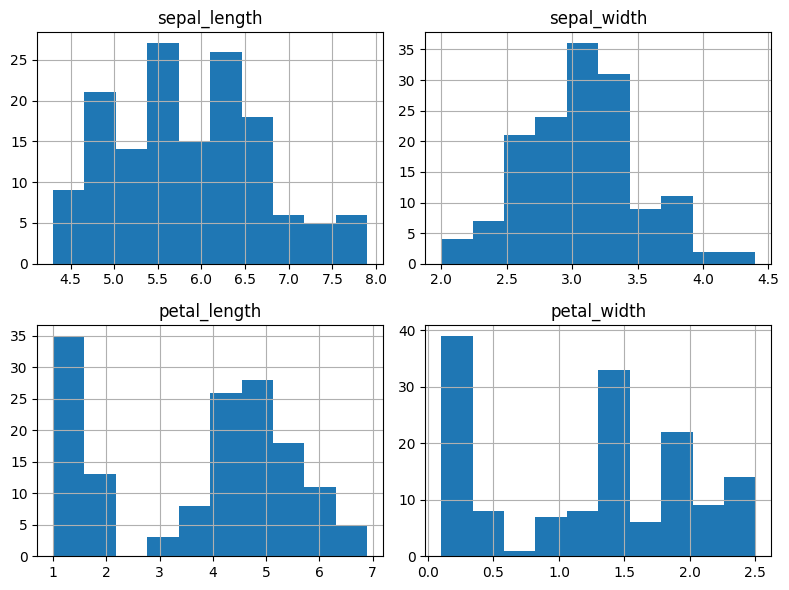

In [63]:
# Step 6: Distribution and class balance checks
print("Class distribution:\n", df["species"].value_counts())

# Quick histograms
df[num_cols].hist(figsize=(8,6))
plt.tight_layout()
plt.show()




<Figure size 1000x600 with 0 Axes>

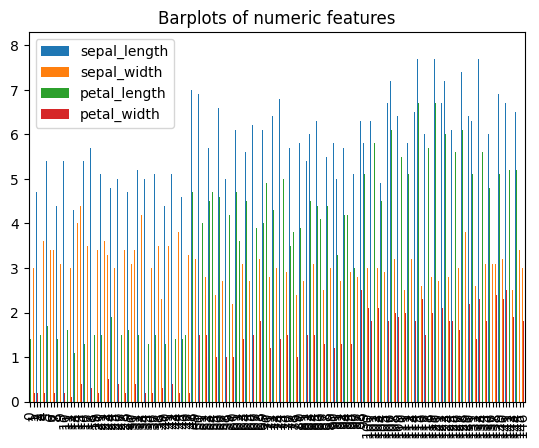

In [64]:
# Step 6: Boxplots to inspect spread and potential outliers
plt.figure(figsize=(10,6))
df[num_cols].plot(kind="bar")
plt.title("Barplots of numeric features")
plt.show()


In [65]:
# Step 7: Outlier check with IQR rule (optional diagnostic)
def iqr_outliers(series, k=1.5):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return (series < lower) | (series > upper)

outlier_counts = {col: iqr_outliers(df[col]).sum() for col in num_cols}
print("Potential outliers per feature:", outlier_counts)

# We usually do not remove outliers in Iris; just report


Potential outliers per feature: {'sepal_length': np.int64(0), 'sepal_width': np.int64(4), 'petal_length': np.int64(0), 'petal_width': np.int64(0)}


In [66]:
# Step 8: Label encode the target (species)
le = LabelEncoder()
df["species_label"] = le.fit_transform(df["species"])
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Label mapping: {'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}


In [67]:
# Step 9: Feature/target split
X = df[num_cols].copy()
y = df["species_label"].copy()

print("Features shape:", X.shape, "Target shape:", y.shape)



Features shape: (147, 4) Target shape: (147,)


In [68]:
# Step 10: Train-test split with stratification to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)
print("Train class distribution:\n", pd.Series(y_train).value_counts())
print("Test class distribution:\n", pd.Series(y_test).value_counts())


Train shapes: (117, 4) (117,)
Test shapes: (30, 4) (30,)
Train class distribution:
 species_label
1    40
2    39
0    38
Name: count, dtype: int64
Test class distribution:
 species_label
1    10
2    10
0    10
Name: count, dtype: int64


In [69]:
# Step 11: Feature scaling (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame with column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_cols, index=X_test.index)

X_train_scaled.head()


,sepal_length,sepal_width,petal_length,petal_width
65,-0.040953,-0.743554,0.179257,-0.279931
88,-0.391551,-0.967770,0.349770,-0.015803
101,0.543377,-0.295122,1.031820,0.776584
50,1.244572,0.153310,0.633957,0.380391
127,1.595170,-0.070906,1.145495,0.512455


In [70]:
# Step 12: Save the processed datasets locally in Colab
processed_train = pd.concat([X_train_scaled, y_train], axis=1)
processed_test = pd.concat([X_test_scaled, y_test], axis=1)

processed_train.to_csv("iris_train_processed.csv", index=False)
processed_test.to_csv("iris_test_processed.csv", index=False)

print("Saved files:")
!ls -lh iris_*_processed.csv


Saved files:
-rw-r--r-- 1 root root 2.4K Nov 26 12:16 iris_test_processed.csv
-rw-r--r-- 1 root root 9.3K Nov 26 12:16 iris_train_processed.csv


In [71]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, classification_report, log_loss, confusion_matrix
)

In [72]:
# Step 12: Train Decision Tree (entropy criterion)
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
dt.fit(X_train_scaled, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

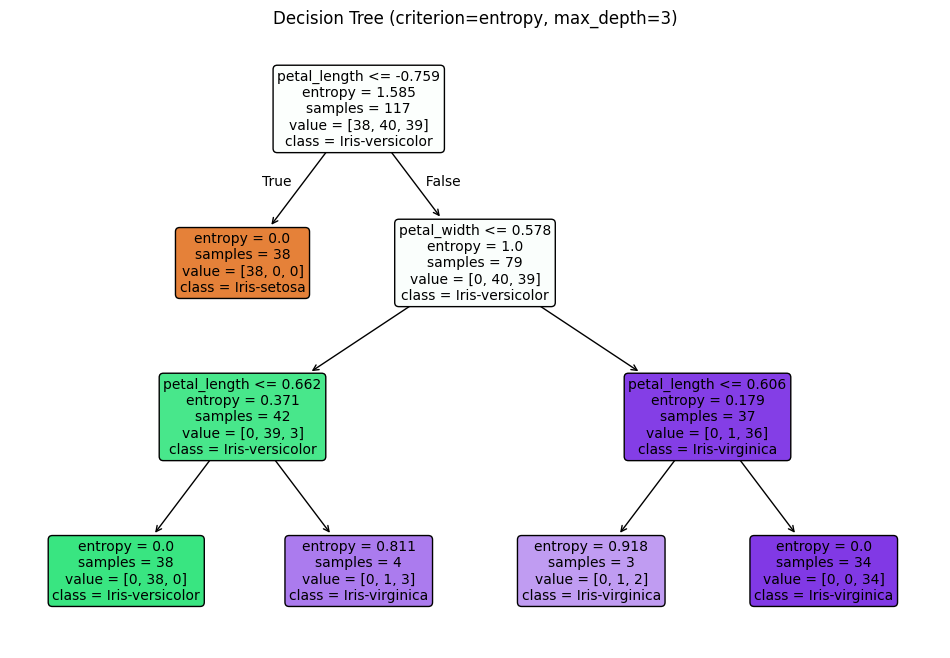

In [73]:
# Step 13: Visualize the tree
plt.figure(figsize=(12,8))
plot_tree(
    dt,
    feature_names=num_cols,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (criterion=entropy, max_depth=3)")
plt.show()


In [74]:
# Step 14: Predictions and probabilities
y_pred = dt.predict(X_test_scaled)
y_proba = dt.predict_proba(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.9666666666666667

Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



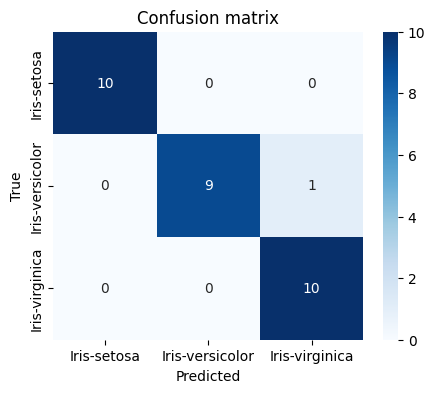

In [75]:
# Step 15: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix")
plt.show()


In [76]:
# Step 16: Log loss (multiclass)
# Log loss expects probabilities; lower is better (0 is perfect)
ll = log_loss(y_test, y_proba)
print("Log loss:", ll)


Log loss: 1.2245600189892367


In [77]:
# Step 17: Entropy helper
def entropy_from_counts(counts):
    total = counts.sum()
    p = counts / total
    p = p[p > 0]  # remove zeros
    return -np.sum(p * np.log2(p))

# Dataset (root) entropy based on training labels
root_counts = pd.Series(y_train).value_counts().sort_index()
root_entropy = entropy_from_counts(root_counts.values)
print("Root entropy (train set):", round(root_entropy, 4))


Root entropy (train set): 1.5846


In [78]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)



In [79]:
# Step 1: Left child entropy
left_counts = pd.Series(y_train_array[left_mask]).value_counts().reindex(range(len(iris.target_names)), fill_value=0)
print("Left child counts:", left_counts.to_dict())
left_entropy = entropy_from_counts(left_counts.values)
print("Left child entropy:", round(left_entropy, 4))

Left child counts: {0: 38, 1: 0, 2: 0}
Left child entropy: -0.0


In [80]:
# Step 2: Right child entropy
right_counts = pd.Series(y_train_array[right_mask]).value_counts().reindex(range(len(iris.target_names)), fill_value=0)
print("Right child counts:", right_counts.to_dict())
right_entropy = entropy_from_counts(right_counts.values)
print("Right child entropy:", round(right_entropy, 4))

Right child counts: {0: 0, 1: 40, 2: 39}
Right child entropy: 0.9999


In [81]:
# Step 3: Weighted children entropy
n_left, n_right = left_counts.sum(), right_counts.sum()
n_total = n_left + n_right
weighted_children_entropy = (n_left/n_total)*left_entropy + (n_right/n_total)*right_entropy
print("Weighted children entropy:", round(weighted_children_entropy, 4))

Weighted children entropy: 0.6751


In [82]:
# Step 3: Information Gain
info_gain_first_split = root_entropy - weighted_children_entropy
print("Information Gain (first split):", round(info_gain_first_split, 4))

Information Gain (first split): 0.9095
